## This code will plot the distribution chart of one stat. Need to run the FBRef dataset download first.
#### Then, just change the variables around line 20-25 and you're on your way!

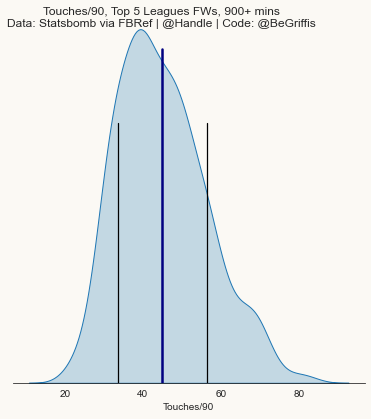

In [1]:
# import pkg_resources
# pkg_resources.require("seaborn==0.11.1")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statistics import *
from math import pi
import os
from pathlib import Path
sns.set_style("white", {"axes.facecolor": "#fbf9f4"})

# this is the file path root, i.e. where this file is located
root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'

############### Enter the desired info here ###############

comp = ''               # Competition (leave '' if you want to see all top 5 leagues instead of just 1)
mins = 900              # Minutes to filter on
pos = 'FW'              # Position to filter on
x = "TouchesPer90"   # Variable you want to see the distribution for
label = 'Touches/90'   # The X label for the graph
sig = '@Handle'         # Your handle

############################################################

final_nongk = 'Final FBRef'     # File name for the final player dataset, created by the FBRef download file
final_gk = 'Final FBRef GK'     # File name for the final GK dataset, created by the FBRef download file

if pos != 'GK':
    df = pd.read_csv("%s%s.csv" %(root, final_nongk))
elif pos == 'GK':
    df = pd.read_csv("%s%s.csv" %(root, final_gk))

# Clean up some of the columns & add a couple more if needed
df["Comp"] = df["Comp"].replace("eng Premier League","Premier League")
df["Comp"] = df["Comp"].replace("fr Ligue 1","Ligue 1")
df["Comp"] = df["Comp"].replace("de Bundesliga","Bundesliga")
df["Comp"] = df["Comp"].replace("it Serie A","Serie A")
df["Comp"] = df["Comp"].replace("es La Liga","La Liga")
df["AerialWin%"] = (df["AerialWins"]/(df["AerialWins"]+df["AerialLoss"]))*100
df["PctCmpFinal1/3"] = (df["Final1/3Cmp"]/df["PassesCompleted"])*100
df['xA Per Key Pass'] = df['xAPer90'] / df['KeyPassesPer90']
df['% of Passes Under Pressure'] = df['PassUnderPressPer90'] / df['PassesAttemptedPer90']
pct = '%'

### The prgram to actually make the chart
dfDist = df[df['Min']>=mins]
if comp != '':
    dfDist = dfDist[dfDist['Comp']==comp]
dfDist = dfDist[dfDist['Pos'].str.contains(pos)]

#### If you want to exclude any specific FBRef position, do that here. II will update code in the future to have players' actual positions instead of FBRef's basic positions
# dfDist = dfDist[dfDist['Pos']!='DF,FW']

# calculate mean, median, and standard deviations
sd = stdev(dfDist[x])
mu = mean(dfDist[x])
med = median(dfDist[x])

ax = sns.displot(dfDist, x=x, kind="kde", fill=True, bw_adjust=1)
plt.axvline(mu, 0, .9, lw=2.5, color='navy')         # plots the mean line
# plt.axvline(med, 0, .9, lw=1, color='maroon')       # plots the median line ((UNCOMMENT IF YOU WANT IT))
plt.axvline(mu+sd, 0, .7, lw=1.25, color='black')    # plots the +1 std.dev
plt.axvline(mu-sd, 0, .7, lw=1.25, color='black')    # plots the -1 std.dev

### This section annotates the mean, median, and std dev. Youll need to change the y-axis placement (here, 14/12/13)
### to find the y-axis placements you want, comment the "ax.set(yticks=[])" below. You can then see the rane of the y axis
### and decide where you want the labels.
### of course, if you don't  want labels, just leave them commented out!

# plt.annotate('Mean (Navy line): %.4f' %mu, xy=(mu+(2*sd),14))
# plt.annotate('Std.Dev (Black lines): %.2f' %sd, xy=(mu+(2*sd),12))
# plt.annotate('Median (Maroon line): %.4f' %med, xy=(mu+(2*sd),13))

ax.set(xlabel=label)
ax.set(ylabel=None)
ax.set(yticks=[])  # comment this out to see the y-axis labels for text positioning if needed
sns.despine(left=True)

if comp == '':
    comp = 'Top 5 Leagues'
ax.fig.suptitle('%s, %s %ss, %i+ mins\nData: Statsbomb via FBRef | %s | Code: @BeGriffis'%(label,comp,pos,mins,sig))

fig = plt.gcf()
fig.set_size_inches(6, 6) # Change the size if you want to
fig.patch.set_facecolor('#fbf9f4')